In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
path=os.chdir('/content/drive/MyDrive/多媒體程式設計')

Mounted at /content/drive


In [2]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#讀取音訊 open/wave
from pydub import AudioSegment
import wave

with open('StarWars3.wav','rb') as wavfile:
  read = wavfile.read()
  print(type(read))
  for bit in range(0, 44, 4):
    bys = read[bit:bit+4]
    print(bys)

print('-'*70)

wavobj = wave.open('StarWars3.wav', 'rb')
params = wavobj.getparams()
print(params)
nchannels, sampwidth, framerate, nframes = params[:4]
str_data = wavobj.readframes(nframes)
print(type(str_data))
signal = np.frombuffer(str_data, dtype ="int16")
wave_data = np.fromstring(str_data, dtype="int16")
print(signal)
print(wave_data)
print('-'*70)



<class 'bytes'>
b'RIFF'
b'\xf0\x04\x02\x00'
b'WAVE'
b'fmt '
b'\x10\x00\x00\x00'
b'\x01\x00\x01\x00'
b'"V\x00\x00'
b'D\xac\x00\x00'
b'\x02\x00\x10\x00'
b'data'
b'\xcc\x04\x02\x00'
----------------------------------------------------------------------
_wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=66150, comptype='NONE', compname='not compressed')
<class 'bytes'>
[    0     0     0 ... -1502    26   414]
[    0     0     0 ... -1502    26   414]
----------------------------------------------------------------------


<ipython-input-43-7ad08c20cc86>:21: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(str_data, dtype="int16")


In [ ]:
from pydub import AudioSegment
audobj = AudioSegment.from_wav('StarWars3.wav')      # 讀取 wav 檔案
print(type(audobj))
print(audobj.raw_data)
print(audobj.channels)
print(audobj.duration_seconds)
print(audobj.frame_rate)
print(audobj.dBFS)
#位元深度 = 資料長度/(取樣頻率*秒數)*8
print(len(audobj.raw_data)/(audobj.frame_rate*3)*8)       #計算位元深度
print('-'*70)

<class 'pydub.audio_segment.AudioSegment'>
b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

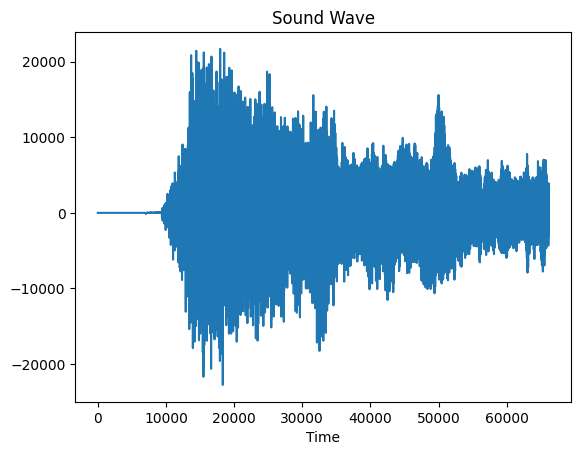

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from pydub import AudioSegment

fig, ax = plt.subplots()  # 建立單一圖表

# 建立繪製聲波的函式
wave = AudioSegment.from_wav("StarWars3.wav") 
signal = np.frombuffer(wave.raw_data, dtype ="int16")  
f_rate = wave.frame_rate   
time = np.linspace(0, len(signal), len(signal))     #linspace函數可以在一定範圍內來均勻地撒點, 時間軸為0~資料長度, 點數為取樣的點數 

ax.plot(time, signal)          # 畫線，橫軸時間，縱軸陣列值
plt.title("Sound Wave")        
plt.xlabel("Time")             
plt.show()


176400
220500
110250


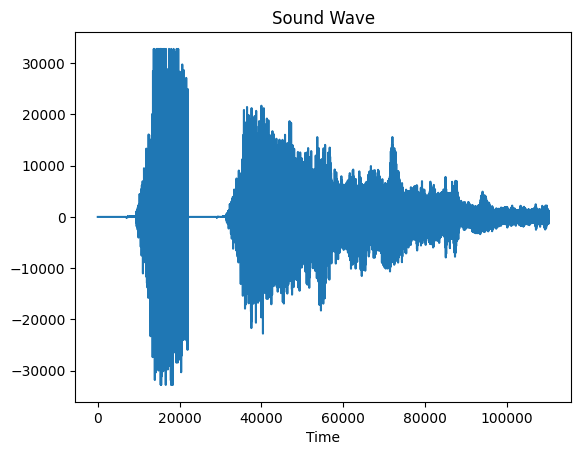

In [ ]:
#操作音訊
from pydub import AudioSegment
import matplotlib.pyplot as plt
audobj = AudioSegment.from_wav('StarWars3.wav')
begin = audobj[:1000]
end = audobj[-1000:]

begin = begin + 5
end = end - 10


concat=begin+audobj
print(len(concat.raw_data))
concat2=concat+end
print(len(concat2.raw_data))

concat2.export('StarWars3_out', format='wav')

fig, ax = plt.subplots() 
concat_np = np.frombuffer(concat2.raw_data, dtype ="int16")
time = np.linspace(0, len(concat_np), len(concat_np))
print(len(concat_np))
ax.plot(time, concat_np)
plt.title("Sound Wave")        
plt.xlabel("Time")             
plt.show()


198450


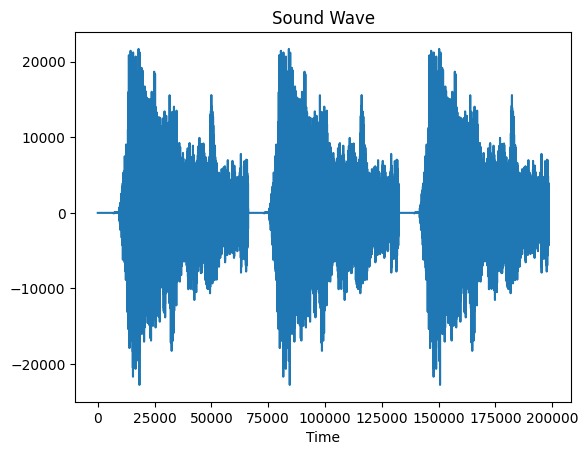

In [8]:
#操作音訊
from pydub import AudioSegment
import matplotlib.pyplot as plt
audobj = AudioSegment.from_wav('StarWars3.wav')

audobj=audobj*3
fig, ax = plt.subplots() 
audobj_np = np.frombuffer(audobj.raw_data, dtype ="int16")
time = np.linspace(0, len(audobj_np), len(audobj_np))
print(len(audobj_np))
ax.plot(time, audobj_np)
plt.title("Sound Wave")        
plt.xlabel("Time")             
plt.show()


66150


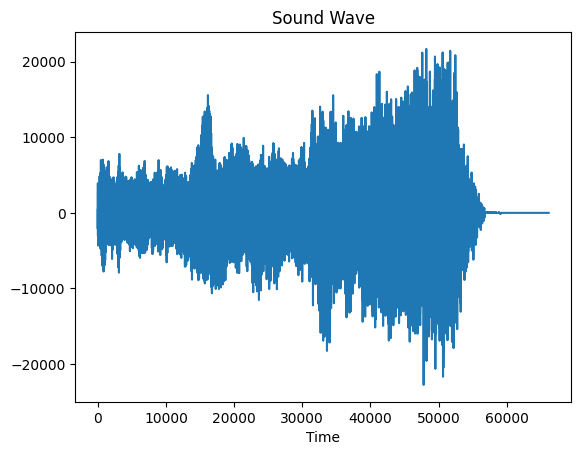

In [ ]:
#操作音訊
from pydub import AudioSegment
import matplotlib.pyplot as plt
audobj = AudioSegment.from_wav('StarWars3.wav')

audobj=audobj.reverse()
fig, ax = plt.subplots() 
audobj_np = np.frombuffer(audobj.raw_data, dtype ="int16")
time = np.linspace(0, len(audobj_np), len(audobj_np))
print(len(audobj_np))
ax.plot(time, audobj_np)
plt.title("Sound Wave")        
plt.xlabel("Time")             
plt.show()

45620


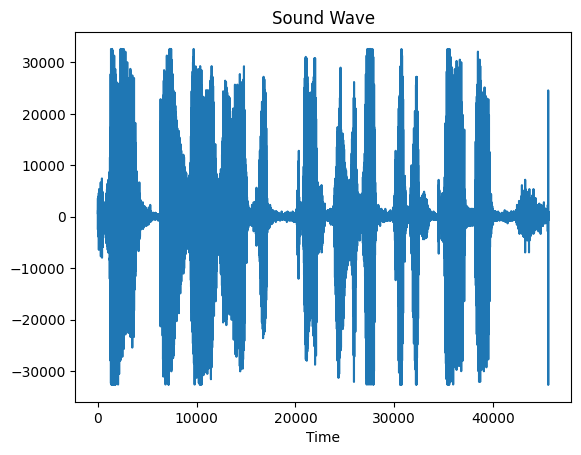

66771


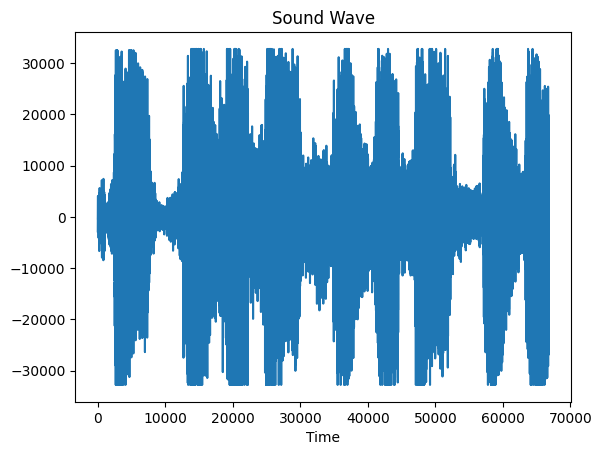

In [6]:
from pydub import AudioSegment 
import matplotlib.pyplot as plt                     
audobj1 = AudioSegment.from_wav('StarWars3.wav')      
audobj2 = AudioSegment.from_wav('taunt.wav')
audobj3 = audobj2[:1000]   
output = audobj1.overlay(audobj3, loop=True)            
output.export('StarWars3_overlay', format="wav")

fig, ax = plt.subplots() 
audobj_np = np.frombuffer(audobj2.raw_data, dtype ="int16")
time = np.linspace(0, len(audobj_np), len(audobj_np))
print(len(audobj_np))
ax.plot(time, audobj_np)
plt.title("Sound Wave")        
plt.xlabel("Time")             
plt.show()

fig2, ax2 = plt.subplots() 
audobj_np2 = np.frombuffer(output.raw_data, dtype ="int16")
time2 = np.linspace(0, len(audobj_np2), len(audobj_np2))
print(len(audobj_np2))
ax2.plot(time2, audobj_np2)
plt.title("Sound Wave")        
plt.xlabel("Time")             
plt.show()